In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from collections import Counter

In [49]:
train_data = pd.read_csv('./train.csv', index_col = 'Id')
test_data = pd.read_csv('./test.csv', index_col = 'Id')

print(train_data.shape)
train_data.groupby('Functional').count()
# tmp = train_data[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]]
# tmp.corr().abs()
# plt.figure(figsize=(100, 100))
# sb.heatmap(tmp.corr().abs(),  annot=True)
# plt.show()

(1460, 77)


MSSubClass  LotFrontage  LotArea  Street  LotShape  LandContour  \
Functional                                                                    
Maj1                14           12       14      14        14           14   
Maj2                 5            5        5       5         5            5   
Min1                31           24       31      31        31           31   
Min2                34           28       34      34        34           34   
Mod                 15           14       15      15        15           15   
Sev                  1            0        1       1         1            1   
Typ               1360         1118     1360    1360      1360         1360   

            Utilities  LotConfig  LandSlope  Neighborhood  ...  ScreenPorch  \
Functional                                                 ...                
Maj1               14         14         14            14  ...           14   
Maj2                5          5          5             5  ...            5   
Min1               31         31         31            31  ...           31   
Min2               34         34         34            34  ...           34   
Mod                15         15         15            15  ...           15   
Sev                 1          1          1             1  ...            1   
Typ              1360       1360       1360          1360  ...         1360   

            PoolArea  PoolQC  Fence  MiscVal  MoSold  YrSold  SaleType  \
Functional                                                               
Maj1              14       0      4       14      14      14        14   
Maj2               5       0      0        5       5       5         5   
Min1              31       0     16       31      31      31        31   
Min2              34       0      8       34      34      34        34   
Mod               15       0      3       15      15      15        15   
Sev                1       0      0        1       1       1         1   
Typ             1360       7    250     1360    1360    1360      1360   

            SaleCondition  SalePrice  
Functional                            
Maj1                   14         14  
Maj2                    5          5  
Min1                   31         31  
Min2                   34         34  
Mod                    15         15  
Sev                     1          1  
Typ                  1360       1360  

[7 rows x 76 columns]

# Plan
1. empty values/NaNs  - we can think about imputation or smarter way to drop samples
2. check for outliers
3. see distributions for features
4. remove features that has small variability   - 
5. mapping classes into numeric values
6. look into feature correlation

**1**

In [50]:
#train_data
def factorize_categorical(df):
    df_copy = df.copy() 
    mapping_map = {
        "LotShape": {"Reg":1, "IR1":2/3 , "IR2":1/3, "IR3":0},
        "LandContour": {"Lvl":1 , "Bnk":2/3 , "HLS":1/3, "Low":0},
        "LotConfig": {"Inside":1, "Corner":0.75, "CulDSac":0.5, "FR2":0.25, "FR3":0},
        "LandSlope": {"Gtl":1, "Mod":0.5,  "Sev":0},
        "BldgType": {"1Fam":1, "2FmCon":0.75, "Duplx":0.5, "TwnhsE":0.25, "TwnhsI":0},
        "ExterQual": {"Ex":1, "Gd":0.75, "TA":0.5, "Fa":0.25, "Po":0},
        "ExterCond": {"Ex":1, "Gd":0.75, "TA":0.5, "Fa":0.25, "Po":0},
        "BsmtQual": {"Ex":1, "Gd":0.8, "TA":0.6, "Fa":0.4, "Po":0.2, "NA":0},
        "BsmtCond": {"Ex":1, "Gd":0.8, "TA":0.6, "Fa":0.4, "Po":0.2, "NA":0},
        "BsmtExposure": {"Gd":1, "Av":0.75, "Mn":0.5, "No":0.25, "NA":0},
        "BsmtFinType1": {"GLQ":1, "ALQ":5/6, "BLQ":4/6, "Rec":3/6, "LwQ":2/6, "Unf":1/6, "NA":0},
        "BsmtFinType2": {"GLQ":1, "ALQ":5/6, "BLQ":4/6, "Rec":3/6, "LwQ":2/6, "Unf":1/6, "NA":0},
        "HeatingQC": {"Ex":1, "Gd":0.75, "TA":0.5, "Fa":0.25, "Po":0},
        "KitchenQual": {"Ex":1, "Gd":0.75, "TA":0.5, "Fa":0.25, "Po":0},
        "Functional": {"Typ":1, "Min1":6/7, "Min2":5/7, "Mod":4/7, "Maj1":3/7, "Maj2":2/7, "Sev":1/7, "Sal":0},
        "FireplaceQu": {"Ex":1, "Gd":0.8, "TA":0.6, "Fa":0.4, "Po":0.2, "NA":0},
        "GarageFinish": {"Fin":1, "RFn":2/3, "Unf": 1/3, "NA":0},
        "GarageQual": {"Ex":1, "Gd":0.8, "TA":0.6, "Fa":0.4, "Po":0.2, "NA":0},
        "GarageCond": {"Ex":1, "Gd":0.8, "TA":0.6, "Fa":0.4, "Po":0.2, "NA":0},
        "PavedDrive": {"Y":1, "P":0.5, "N":0},
        "PoolQC": {"Ex":1, "Gd":0.75, "TA":0.5, "Fa":0.25, "Po":0},
        "Fence": {"GdPrv":1, "MnPrv":0.75, "GdWo":0.5, "MnWw":0.25, "NA":0},
        "SaleCondition": {"Normal":1, "Abnorml":0.75, "Alloca":0.5, "Family":0.25, "Partial":0}
    }
    
    for key, value in mapping_map.items():
        df_copy[key] = df_copy[key].map(value)
        
    return df_copy

In [51]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n = 20):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_rid_of_high_related_columns(df):
    print("Shape before cleaning:", df.shape[1])
    df_copy = df.copy()
    high_impact_on_price = []
    
    top_abs = get_top_abs_correlations(df_copy)

    for ind in top_abs.index:
        if 'SalePrice' in ind:
            high_impact_on_price.append(ind[0])

    for i, k in zip(top_abs.index, top_abs):
        if (i[0] in high_impact_on_price) or (i[1] in high_impact_on_price):
            continue

        if k > 0.75:
            df_copy = df_copy.drop(columns = [i[0]])
            
    print("Shape after cleaning:", df_copy.shape[1])
    return df_copy

def clean_df(df):
    columns_with_na = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond" , "PoolQC", "Fence"]
    s,f = df.shape
    for col in columns_with_na:
        df[col] = df[col].fillna(0)
    
    df = factorize_categorical(df)
    
    print('Info after factorize_categorical')
    print(df.info())
    
    #object col to numerical (so we can analyze the data dist and detect outliers). I also printed all the 
    # uniques values. The main "issue" is the we ifnore from context in this transformation- in case of 
    # values like:
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
    
    obj_columns = []
    
    for col in df.columns:
        if (df[col].dtype == object):
            obj_columns.append(col)
            df[col], uniques = pd.factorize(df[col])  #nan values will be marked as -1. 
#             print(f"{col} values:", uniques) 
    
    print('Object columns ******')
    print(obj_columns)
    
    # fillna with mean col value
    df= df.fillna(df.mean())

    print(df.shape, "before zscore")
    # remove outliers by there Z-score (example" LotArea column)
    # The recommended threshold is 3, but it cuased a big number of drops so I increased it to 5 
    df= df[(np.abs(zscore(df)) < 5).all(axis=1)]
    print(df.shape, "after zscore")
    
    #detect columns with high precantage from one value
    low_variance_col = []
    
    percentage= 0.99
    for col in df.columns:
        count= df[col].value_counts(normalize=True).values
        if sum(count>percentage):
            low_variance_col.append(col)
    
    df = df.drop(columns = low_variance_col)
    
    df = get_rid_of_high_related_columns(df)
    return df

    #     print("# of samples were dropped:", s-df.dropna().shape[0],np.round(100*(s-df.dropna().shape[0])/s,2), "% of the samples")

In [52]:
def data_dist(df):
    n_col = 6
    n_row = np.ceil(df.shape[1]/n_col)
    fig = plt.figure(figsize=(3 * n_col, 2.4 * n_row))  
    for i, col in enumerate(df.columns):
        plt.subplot(n_row, n_col, i + 1)
        n, bins, patches= plt.hist(df[col], density=True)
        plt.title(col, y=1.03)
    fig.tight_layout(pad=2)

In [53]:
# test_data.isna().sum() > 0
# test_data.columns[test_data.isna().sum() > 0]
# [a for a in zip(test_data.columns, test_data.isnull().sum().tolist())]

# test_data = test_data.replace(np.nan, 'Data N/A')

# [a for a in zip(test_data.columns, test_data.isnull().sum().tolist())]
# test_data[test_data.LotFrontage.isna()]

# test_data.PoolQC.map({ np.nan: 0 })
    
# [a for a in zip(test_data.columns, test_data.isnull().sum().tolist())]

# test_data.PoolQC

Info after factorize_categorical
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1334 non-null   float64
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460

<ipython-input-52-4054fa8dea82>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_row, n_col, i + 1)


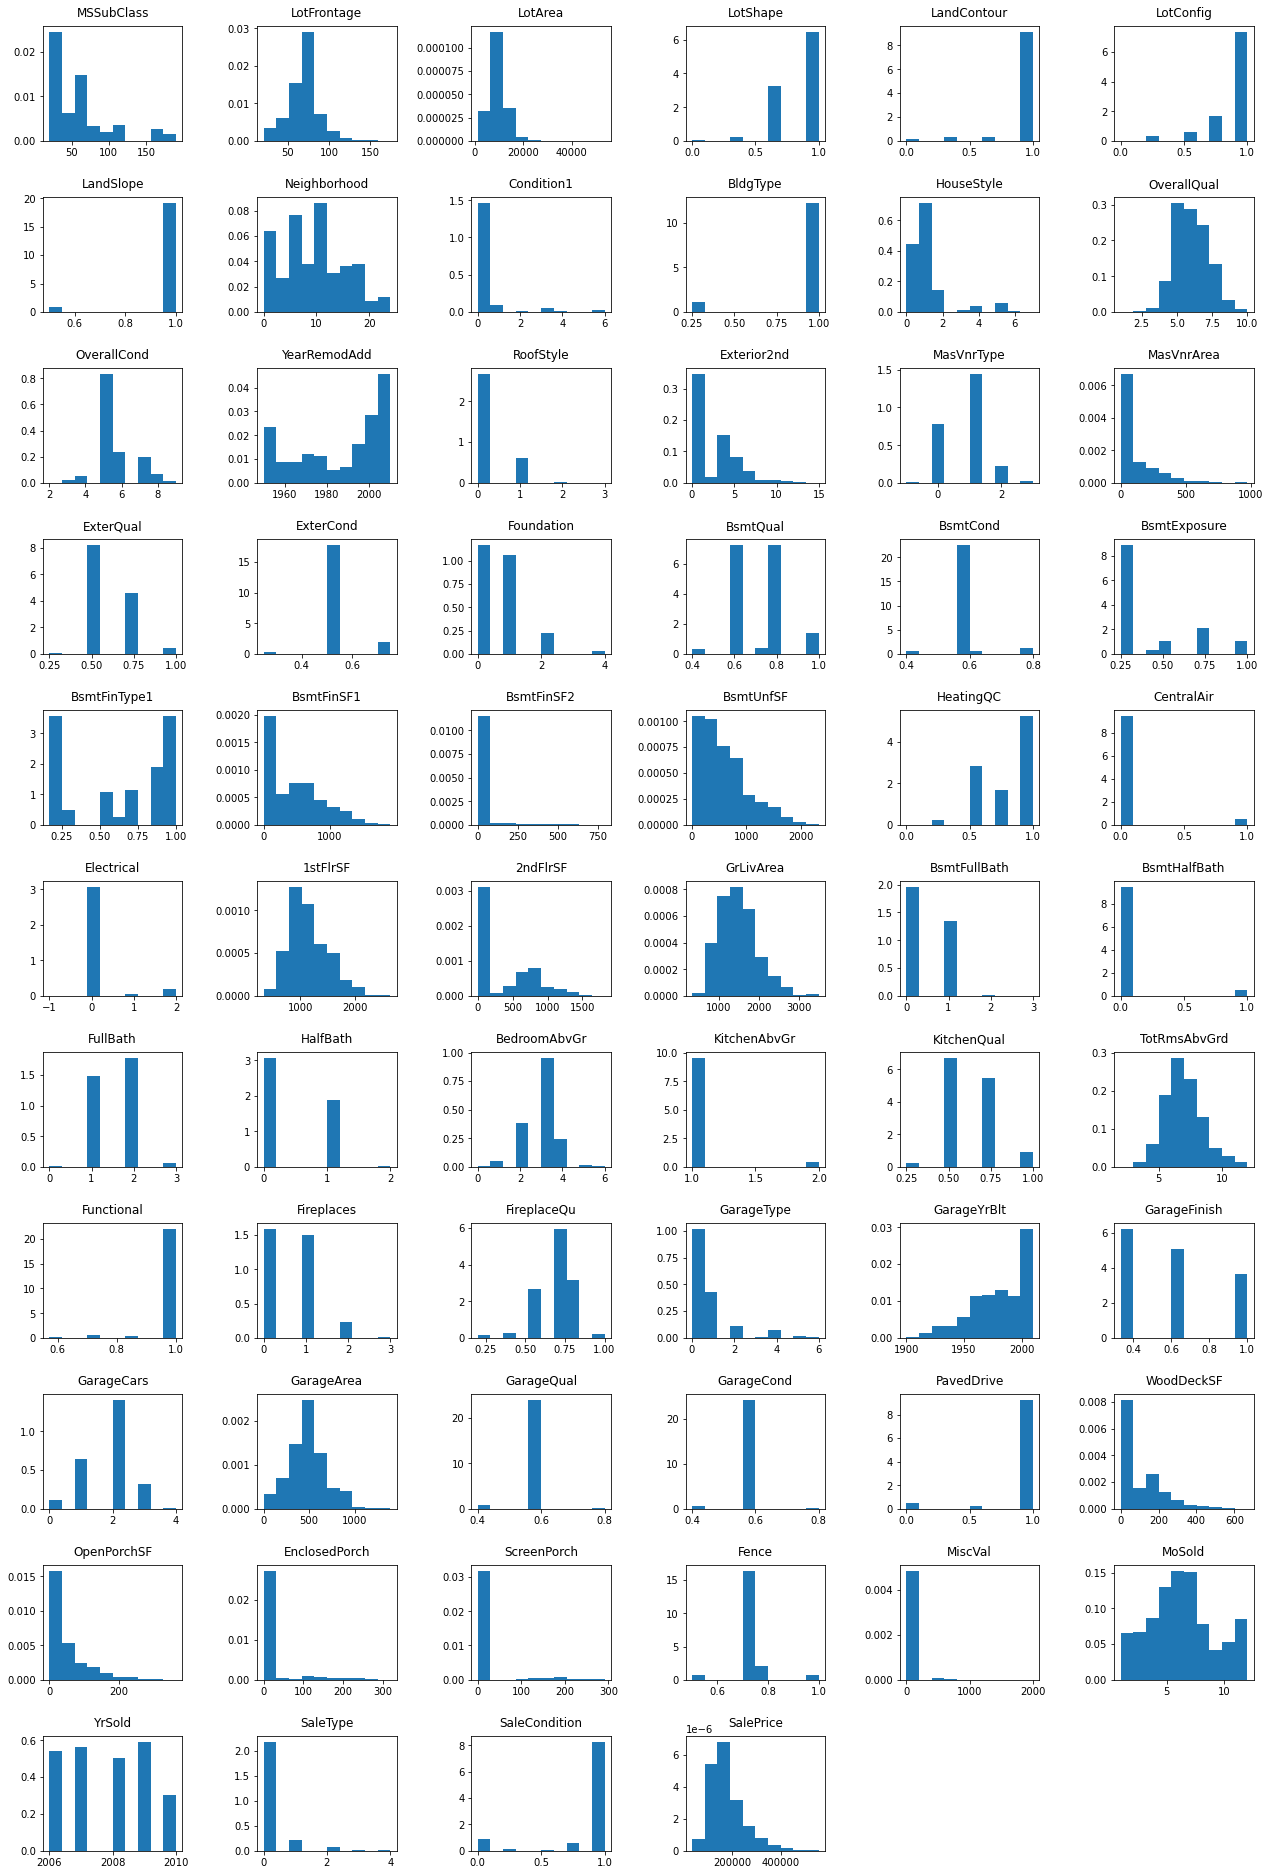

In [54]:
train= clean_df(train_data)
data_dist(train)

In [28]:
plt.figure(figsize=(200, 200), dpi=100)
sb.heatmap(train.corr().abs(),  annot=True)
plt.show()

Info after factorize_categorical
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   float64
 6   LandContour    1459 non-null   float64
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   float64
 9   LandSlope      1459 non-null   float64
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1318 non-null   float64
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459

<ipython-input-6-4054fa8dea82>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_row, n_col, i + 1)


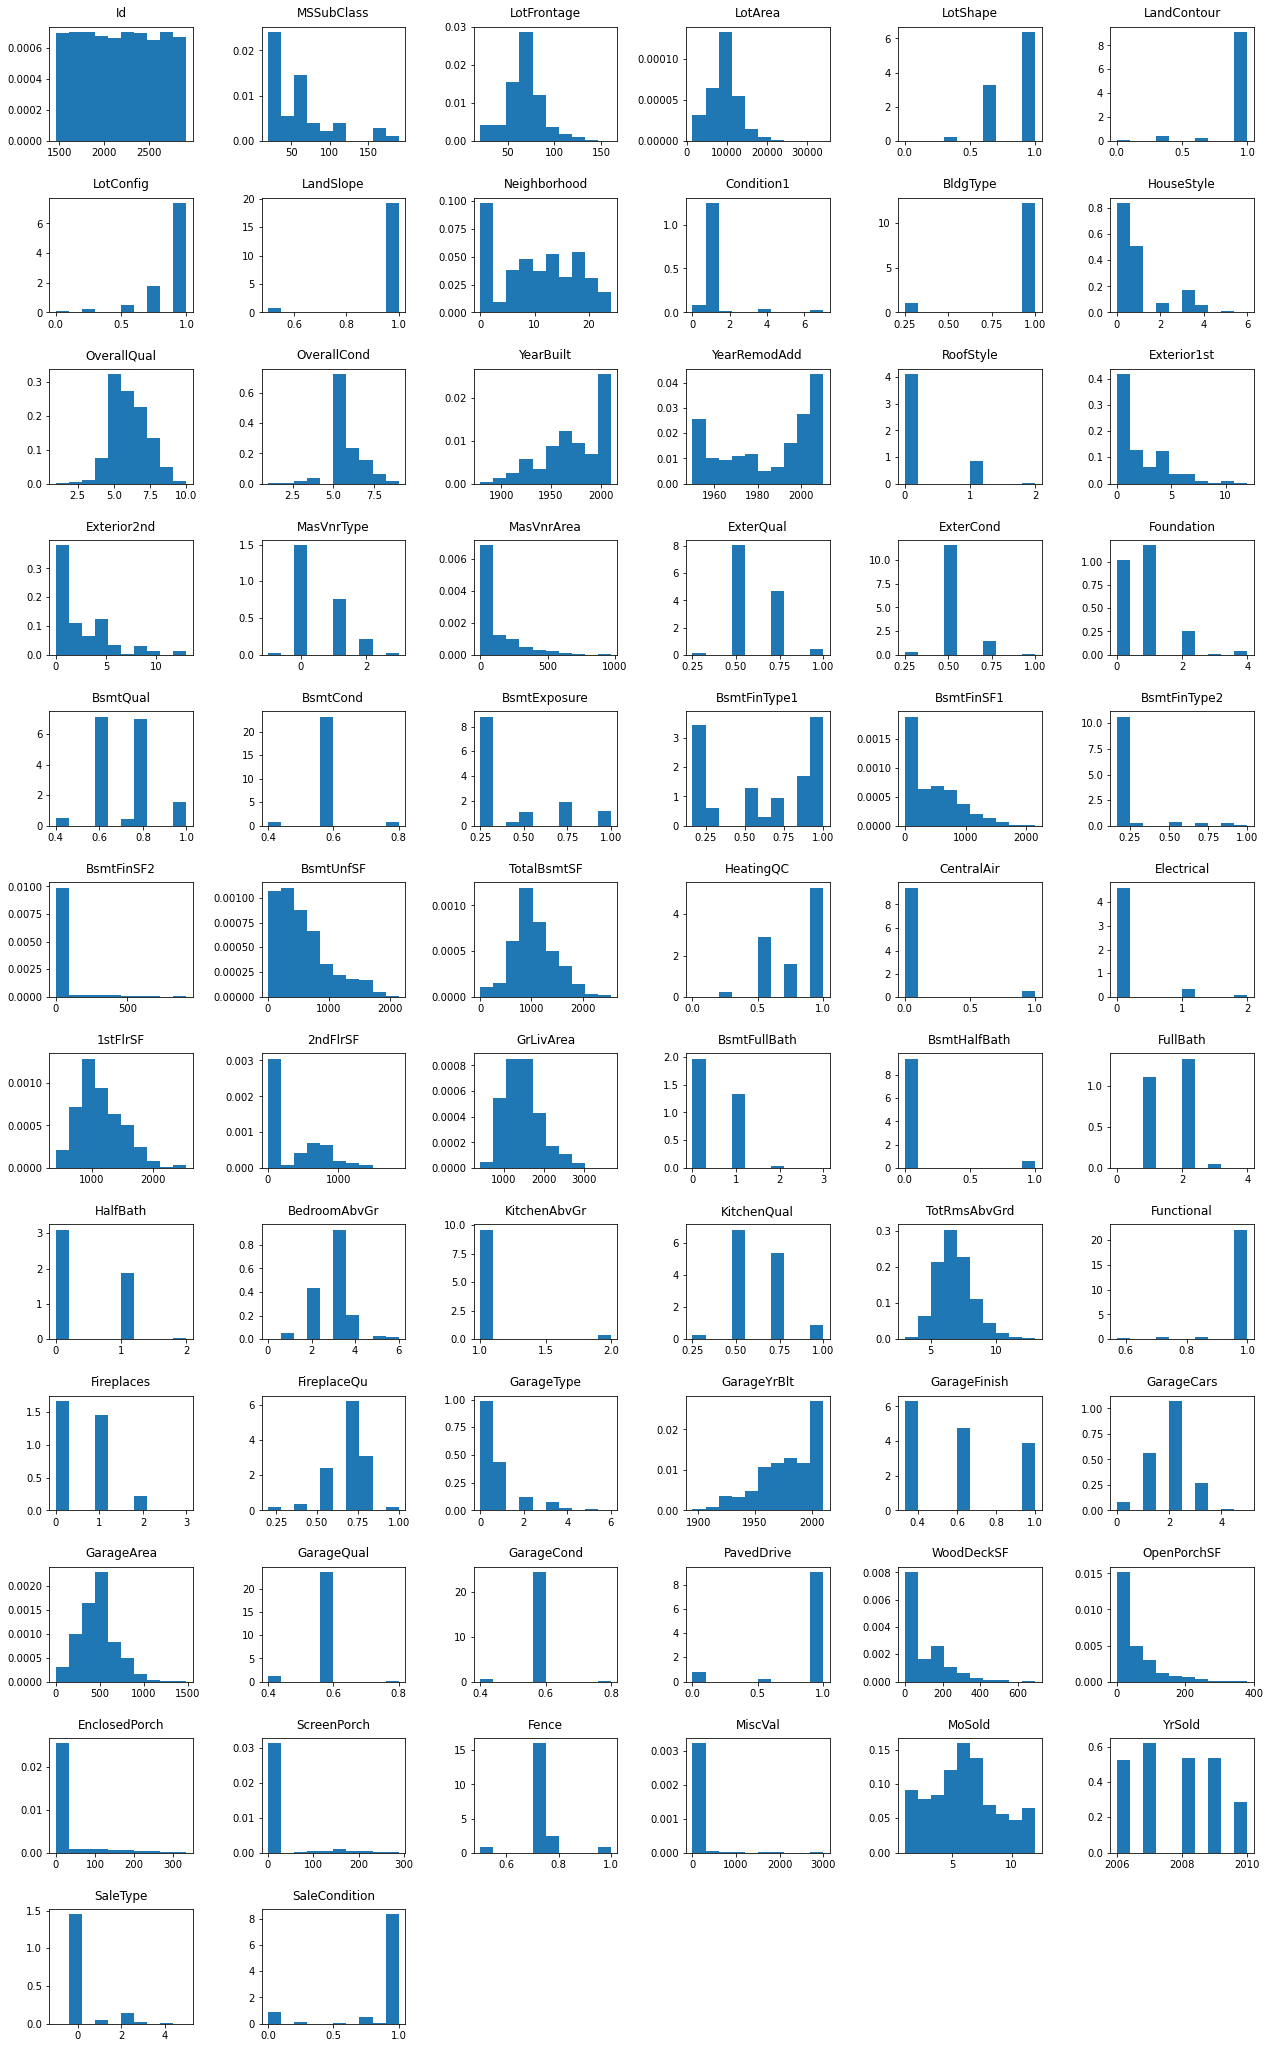

In [10]:
test= clean_df(test_data)
data_dist(test)


In [63]:
# basically I want to clean outliers and find 
# col; where most samples have the same values